# 2EQUIPONDERADA_DIVERSIFICACION: ANÁLISIS DE CARTERAS EQUIPONDERADAS Y DIVERSIFICACIÓN

Este notebook demuestra el funcionamiento del módulo `2equiponderada_diversificacion`, que se encarga del análisis de carteras equiponderadas y el efecto de la diversificación.

## Objetivos del Notebook

1. **Análisis de Cartera Equiponderada**: Descomponer el riesgo en componentes sistemáticos y específicos
2. **Simulación de Frontera de Diversificación**: Identificar cuántos activos se necesitan para alcanzar el límite práctico
3. **Análisis de Contribuciones**: Entender qué aporta cada activo al rendimiento y riesgo de la cartera
4. **Visualización de Resultados**: Gráficos claros de la frontera eficiente de diversificación

## Estructura del Módulo

El módulo `2equiponderada_diversificacion` contiene las siguientes funciones:
- `analizar_cartera_equiponderada()`: Descompone el riesgo usando la fórmula teórica σ²ₚ = (1/n)V̄ + (1-1/n)σ̄ᵢⱼ
- `simular_frontera_diversificacion()`: Simula el efecto de diversificación variando el número de activos
- `detectar_frontera_optima()`: Identifica el número óptimo de activos según umbral de reducción
- `analizar_contribuciones()`: Calcula contribuciones individuales de activos a rendimiento y riesgo
- `visualizar_frontera_diversificacion()`: Crea visualizaciones de la frontera eficiente

## 1. Importar Librerías y Módulos

Importamos las librerías necesarias y el módulo de diversificación. También necesitamos el módulo `1datos` para cargar los datos.

In [2]:
import sys
import importlib
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar módulos (los nombres que empiezan con números requieren importlib)
# Módulo 1: para cargar datos
datos = importlib.import_module('1datos')

# Módulo 2: para análisis de diversificación
diversificacion = importlib.import_module('2equiponderada_diversificacion')

print("Librerías importadas correctamente")
print(f"Módulo 1datos: {datos.__name__}")
print(f"Módulo 2equiponderada_diversificacion: {diversificacion.__name__}")

Librerías importadas correctamente
Módulo 1datos: 1datos
Módulo 2equiponderada_diversificacion: 2equiponderada_diversificacion


## 2. Cargar Datos de Retornos

Cargamos los datos históricos de retornos diarios usando el módulo `1datos`. Estos datos son la base para todo el análisis de diversificación.

In [3]:
# Cargar datos de retornos diarios
ruta_csv = '../data/prod_long_sharpe_u50_20260116_v5_train_dataset.csv'
retornos = datos.cargar_retornos(ruta_csv)

print(f"Datos cargados: {retornos.shape[0]} días, {retornos.shape[1]} activos")
print(f"\nPrimeras filas:")
print(retornos.head(3))
print(f"\nEstadísticas básicas del dataset:")
print(f"  • Rango de fechas: {retornos.index[0]} a {retornos.index[-1] if len(retornos.index) > 0 else 'N/A'}")
print(f"  • Retorno promedio diario (todos los activos): {retornos.mean().mean():.6f}")
print(f"  • Volatilidad promedio diaria: {retornos.std().mean():.6f}")

Datos cargados: 1760 días, 50 activos
Datos cargados: 1760 días, 50 activos

Primeras filas:
     asset1    asset2    asset3    asset4    asset5    asset6    asset7  \
0  0.014482  0.001804 -0.004049  0.011592  0.006422  0.005713 -0.001772   
1  0.001715 -0.002062 -0.009170 -0.006120  0.007793 -0.004029  0.008242   
2 -0.016415 -0.001549 -0.013395 -0.004101  0.003523 -0.001010 -0.002054   

     asset8    asset9   asset10  ...   asset41   asset42   asset43   asset44  \
0  0.004928  0.012250  0.001355  ...  0.013830  0.008159  0.005384  0.007865   
1 -0.007896 -0.003558  0.002705  ... -0.001637 -0.010346 -0.000632  0.007015   
2 -0.002127 -0.003468 -0.007455  ...  0.001309 -0.008244 -0.005705  0.004725   

    asset45   asset46   asset47   asset48   asset49   asset50  
0 -0.007928  0.011082  0.005190 -0.006186 -0.015544 -0.010406  
1  0.006850  0.000000  0.001393 -0.009351  0.003501 -0.005770  
2 -0.006850 -0.000367 -0.017654 -0.006983  0.006503  0.001577  

[3 rows x 50 columns]

Estad

## 3. Análisis de Cartera Equiponderada

En esta sección analizamos la composición del riesgo de una cartera equiponderada (1/N para cada activo), descomponiéndolo en:

- **Riesgo Específico** (diversificable): Disminuye con más activos → (1/n)V̄
- **Riesgo Sistemático** (no diversificable): Permanece constante → σ̄ᵢⱼ

**Fórmula teórica**: σ²ₚ = (1/n)V̄ + (1-1/n)σ̄ᵢⱼ

Donde:
- V̄: Varianza media de activos individuales
- σ̄ᵢⱼ: Covarianza media entre pares de activos
- n: Número de activos en la cartera

In [4]:
# Descomponer el riesgo de la cartera equiponderada en sus componentes teóricos
print("="*80)
print("ANÁLISIS DE CARTERA EQUIPONDERADA")
print("="*80)
print(f"Analizando cartera equiponderada con {retornos.shape[1]} activos")
print("-"*80)

# Llamar a la función del módulo de diversificación
resultado_eq = diversificacion.analizar_cartera_equiponderada(retornos)

print(f"\nDESCOMPOSICIÓN TEÓRICA DEL RIESGO:")
print(f"   • Varianza media individual (V̄): {resultado_eq['varianza_media']:.6f}")
print(f"   • Covarianza media entre pares (σ̄ᵢⱼ): {resultado_eq['covarianza_media']:.6f}")

print(f"\nCOMPONENTES DEL RIESGO DE CARTERA:")
print(f"   • Riesgo Específico [(1/n)V̄]: {resultado_eq['riesgo_especifico']:.6f}")
print(f"   • Riesgo Sistemático [σ̄ᵢⱼ]: {resultado_eq['riesgo_sistematico']:.6f}")
print(f"   • Varianza Total de Cartera: {resultado_eq['varianza_cartera']:.6f}")

print(f"\nVOLATILIDAD TOTAL (Anualizada):")
print(f"   • σₚ = {resultado_eq['volatilidad_cartera']:.2%}")

# Verificación de fórmula teórica
check_teorico = resultado_eq['riesgo_especifico'] + resultado_eq['riesgo_sistematico']
print(f"\nVerificación: σ²ₚ teórico = {check_teorico:.6f}")
print(f"Verificación: σ²ₚ real = {resultado_eq['varianza_cartera']:.6f}")
print(f"Diferencia: {abs(check_teorico - resultado_eq['varianza_cartera']):.2e}")

ANÁLISIS DE CARTERA EQUIPONDERADA
Analizando cartera equiponderada con 50 activos
--------------------------------------------------------------------------------
ADVERTENCIA: Diferencia entre fórmula teórica y cálculo real: 2.80e-04

DESCOMPOSICIÓN TEÓRICA DEL RIESGO:
   • Varianza media individual (V̄): 0.041127
   • Covarianza media entre pares (σ̄ᵢⱼ): 0.014005

COMPONENTES DEL RIESGO DE CARTERA:
   • Riesgo Específico [(1/n)V̄]: 0.000823
   • Riesgo Sistemático [σ̄ᵢⱼ]: 0.014005
   • Varianza Total de Cartera: 0.014827

VOLATILIDAD TOTAL (Anualizada):
   • σₚ = 12.18%

Verificación: σ²ₚ teórico = 0.014827
Verificación: σ²ₚ real = 0.014827
Diferencia: 0.00e+00


## 4. Simulación de Frontera Eficiente de Diversificación

Simulamos carteras equiponderadas con diferentes números de activos para identificar:

- **Cuántos activos se necesitan** para alcanzar el límite práctico de diversificación
- **Cómo evoluciona el riesgo** al añadir más activos
- **El punto de rendimientos decrecientes** donde añadir más activos no reduce significativamente el riesgo

**Método**: Para cada N, realizamos múltiples simulaciones aleatorias de carteras equiponderadas con N activos y promediamos los resultados.


SIMULACIÓN: FRONTERA EFICIENTE DE DIVERSIFICACIÓN
Probando carteras con N = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50]
100 simulaciones aleatorias por cada N
--------------------------------------------------------------------------------

TABLA RESUMEN: FRONTERA DE DIVERSIFICACIÓN
  N |  Vol(%) |   ±Std |  Esp(%) |  Sis(%) |  Reduc
--------------------------------------------------------------------------------
  2 |   17.99 |   4.06 |   14.09 |   11.91 |    N/A
  3 |   16.43 |   3.01 |   11.74 |   11.89 |  8.67%
  4 |   15.69 |   2.89 |   10.30 |   12.17 |  4.55%
  5 |   14.52 |   2.21 |    8.89 |   11.68 |  7.47%
  6 |   14.43 |   2.04 |    8.38 |   11.92 |  0.58%
  7 |   13.84 |   1.74 |    7.62 |   11.69 |  4.07%
  8 |   14.05 |   1.64 |    7.23 |   12.16 | -1.46%
  9 |   13.86 |   1.60 |    6.87 |   12.14 |  1.36%
 10 |   13.33 |   1.40 |    6.49 |   11.73 |  3.76%
 12 |   13.04 |   1.38 |    5.83 |   11.75 |  2.20%
 15 |   12.69 |   1.13 |    5.19 |   11.63 |  2.7

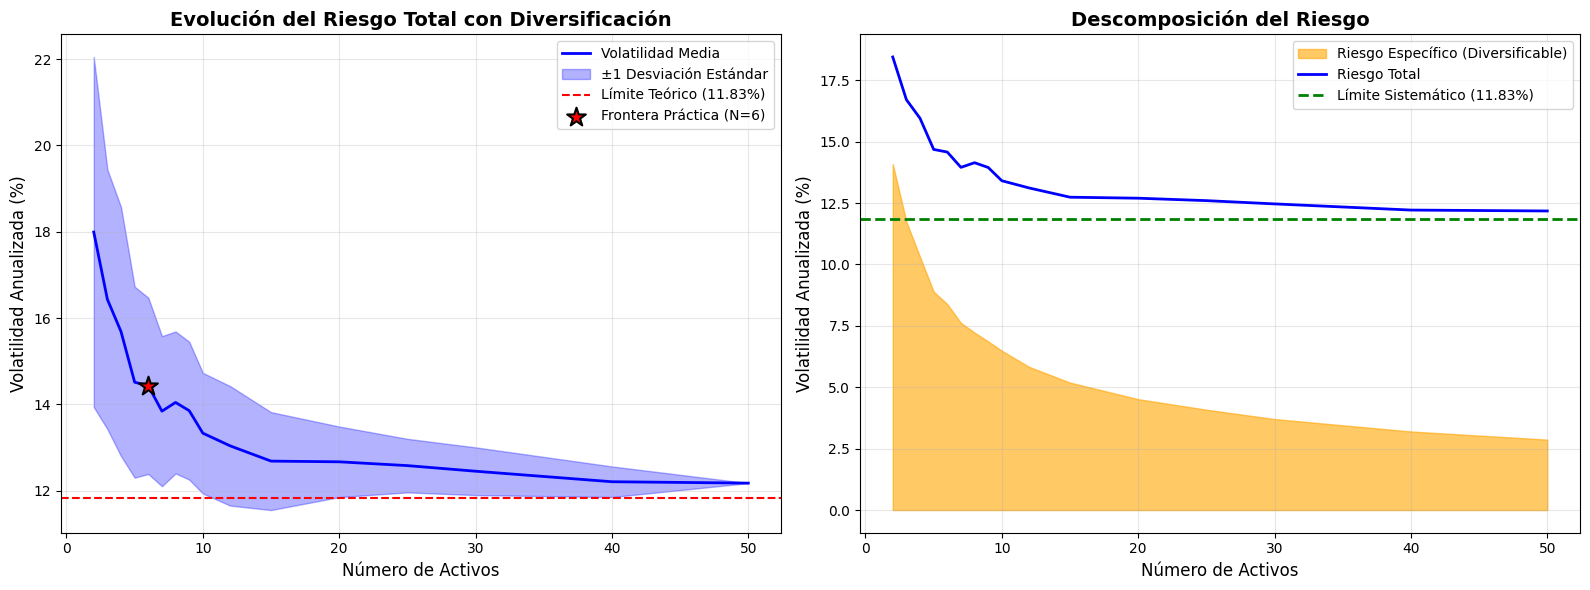

In [5]:
# Ejecutar simulación de frontera de diversificación
print("\n" + "="*80)
print("SIMULACIÓN: FRONTERA EFICIENTE DE DIVERSIFICACIÓN")
print("="*80)
print("Probando carteras con N = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50]")
print("100 simulaciones aleatorias por cada N")
print("-"*80)

# Ejecutar simulación (la función imprime una tabla resumen automáticamente)
df_frontera = diversificacion.simular_frontera_diversificacion(
    retornos, 
    n_valores=[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50],
    n_simulaciones=100
)

# Mostrar resultados (la tabla resumen ya se imprime dentro de simular_frontera_diversificacion)
print("\nRESULTADOS DE SIMULACIÓN:\n")
print(df_frontera.to_string(index=False))

# Identificar frontera práctica usando la función detectar_frontera_optima
print("\n" + "="*80)
print("IDENTIFICACIÓN DE FRONTERA ÓPTIMA")
print("="*80)
n_optimo = diversificacion.detectar_frontera_optima(df_frontera, umbral_reduccion=2.0)
vol_optima = df_frontera[df_frontera['n_activos'] == n_optimo]['volatilidad_media'].iloc[0]

print(f"Número óptimo de activos: {n_optimo}")
print(f"Volatilidad en frontera: {vol_optima:.2%}")
print(f"Beneficio adicional (N={n_optimo}→50): {(df_frontera.iloc[-1]['volatilidad_media'] - vol_optima):.2%}")

# Visualizar frontera de diversificación
print("\n" + "="*80)
print("VISUALIZACIÓN DE FRONTERA DE DIVERSIFICACIÓN")
print("="*80)
diversificacion.visualizar_frontera_diversificacion(
    df_frontera, 
    ruta_guardado='outputs/modulo2_diversificacion.png'
)
plt.show()

## 5. Análisis de Contribuciones Individuales

Analizamos qué aporta cada activo al rendimiento y riesgo de la cartera equiponderada:

- **Contribución al Rendimiento**: wᵢ × E(Rᵢ)
- **Contribución al Riesgo**: wᵢ × Cov(Rᵢ, Rₚ)

También identificamos **activos diversificadores ideales**: aquellos con rendimiento positivo y covarianza negativa con la cartera (aumentan rendimiento y reducen riesgo).

In [6]:
# Análisis de contribuciones individuales de activos
print("\n" + "="*80)
print("ANÁLISIS DE CONTRIBUCIONES A CARTERA EQUIPONDERADA")
print("="*80)

# Analizar contribuciones de cada activo (por defecto usa cartera equiponderada)
df_contrib = diversificacion.analizar_contribuciones(retornos)

# Top 10 contribuyentes al riesgo
print("\nTOP 10 ACTIVOS QUE MÁS APORTAN AL RIESGO:")
print(df_contrib.head(10)[['peso', 'rendimiento_esperado', 'contribucion_riesgo', 'covarianza_cartera']].to_string())

# Activos diversificadores ideales
activos_ideales = df_contrib[df_contrib['es_diversificador']]
if len(activos_ideales) > 0:
    print(f"\nACTIVOS DIVERSIFICADORES IDEALES (Rendimiento>0 y Cov<0):")
    print(f"   Encontrados: {len(activos_ideales)} activos")
    print(activos_ideales[['rendimiento_esperado', 'covarianza_cartera', 'contribucion_riesgo']].to_string())
else:
    print("\nADVERTENCIA: No se encontraron activos diversificadores ideales en esta cartera")

# Estadísticas agregadas
print(f"\nESTADÍSTICAS AGREGADAS:")
print(f"   • Rendimiento total cartera: {df_contrib['contribucion_rendimiento'].sum():.2%}")
print(f"   • Riesgo total cartera: {df_contrib['contribucion_riesgo'].sum():.6f}")
print(f"   • Covarianza promedio con cartera: {df_contrib['covarianza_cartera'].mean():.6f}")


ANÁLISIS DE CONTRIBUCIONES A CARTERA EQUIPONDERADA

TOP 10 ACTIVOS QUE MÁS APORTAN AL RIESGO:
         peso  rendimiento_esperado  contribucion_riesgo  covarianza_cartera
asset47  0.02             -0.007222             0.000529            0.026451
asset21  0.02             -0.068663             0.000520            0.026001
asset17  0.02             -0.110804             0.000518            0.025902
asset38  0.02              0.093480             0.000493            0.024629
asset1   0.02             -0.046920             0.000487            0.024350
asset7   0.02             -0.105155             0.000429            0.021450
asset27  0.02              0.042954             0.000415            0.020756
asset32  0.02             -0.009985             0.000401            0.020067
asset30  0.02             -0.158693             0.000390            0.019505
asset31  0.02              0.022255             0.000384            0.019210

ADVERTENCIA: No se encontraron activos diversificadores i

## Resumen del Módulo 2equiponderada_diversificacion

El módulo `2equiponderada_diversificacion` ha completado exitosamente:

1. **Análisis de cartera equiponderada**: Descomposición del riesgo en componentes sistemáticos y específicos
2. **Simulación de frontera de diversificación**: Identificación del número óptimo de activos necesarios
3. **Análisis de contribuciones**: Evaluación de qué aporta cada activo al rendimiento y riesgo
4. **Visualización de resultados**: Gráficos claros de la frontera eficiente de diversificación

### Conclusiones Clave:

Los resultados de este análisis pueden informar decisiones sobre:
- Cuántos activos incluir en una cartera diversificada
- Qué activos son los mejores diversificadores
- El trade-off entre diversificación y complejidad de gestión

---

**Próximo paso**: El módulo `3markowitz` utilizará estos insights para optimizar carteras considerando el trade-off riesgo-rendimiento.